In [1]:
import numpy as np

# Qiskit Certification Prep - Module 0.1: Single-Qubit Operations

## Section 0.1.1: Pauli Gates

Pauli gates are the basic quantum logic gates. Their matrix representations and actions are:

- **X (NOT gate)**:
  $$X = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}$$
  Swaps $|0⟩$ and $|1⟩$

- **Y**:
  $$Y = \begin{bmatrix} 0 & -i \\ i & 0 \end{bmatrix}$$
  Applies a bit and phase flip

- **Z**:
  $$Z = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix}$$
  Flips the phase of $|1⟩$

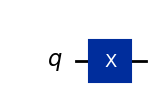

In [2]:
from qiskit import QuantumCircuit
qc = QuantumCircuit(1)
qc.x(0)
qc.draw('mpl')

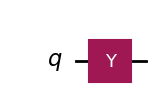

In [3]:
qc = QuantumCircuit(1)
qc.y(0)
qc.draw('mpl')

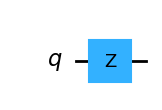

In [4]:
qc = QuantumCircuit(1)
qc.z(0)
qc.draw('mpl')

### Action of Pauli Gates on Basis States

In [5]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector

# Define |+⟩ and |−⟩ statevectors
plus = Statevector([1/2**0.5, 1/2**0.5])
minus = Statevector([1/2**0.5, -1/2**0.5])

# Create the X gate circuit
qc_x = QuantumCircuit(1)
qc_x.x(0)

# Evolve using .to_instruction()
plus_result = plus.evolve(qc_x.to_instruction())
minus_result = minus.evolve(qc_x.to_instruction())

print("X on |+⟩ →", plus_result)
print("X on |−⟩ →", minus_result)

X on |+⟩ → Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))
X on |−⟩ → Statevector([-0.70710678+0.j,  0.70710678+0.j],
            dims=(2,))


### The $|+⟩$ and $|−⟩$ States

These are important quantum states often used when working with the Hadamard gate and measurement in the X-basis:

- $|+⟩ = \frac{1}{\sqrt{2}}(|0⟩ + |1⟩)$
- $|−⟩ = \frac{1}{\sqrt{2}}(|0⟩ - |1⟩)$

They form an **orthonormal basis**, just like $|0⟩$ and $|1⟩$, and are the eigenstates of the Hadamard gate.

### Identity: X = H Z H

In [6]:
qc1 = QuantumCircuit(1)
qc1.h(0)
qc1.z(0)
qc1.h(0)

qc2 = QuantumCircuit(1)
qc2.x(0)

print("Equivalent state:")
print(Statevector.from_label('0').evolve(qc1))
print(Statevector.from_label('0').evolve(qc2))

Equivalent state:
Statevector([0.+0.j, 1.+0.j],
            dims=(2,))
Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


## Section 0.1.2: Rotation Gates

- **RX(θ)**:
  $$RX(\theta) = \begin{bmatrix} \cos(\theta/2) & -i\sin(\theta/2) \\ -i\sin(\theta/2) & \cos(\theta/2) \end{bmatrix}$$

- **RY(θ)**:
  $$RY(\theta) = \begin{bmatrix} \cos(\theta/2) & -\sin(\theta/2) \\ \sin(\theta/2) & \cos(\theta/2) \end{bmatrix}$$

- **RZ(θ)**:
  $$RZ(\theta) = \begin{bmatrix} e^{-i\theta/2} & 0 \\ 0 & e^{i\theta/2} \end{bmatrix}$$

### Advanced Example: Rotation Gate Composition

You can compose multiple rotation gates. For example, two Rx(π/2) gates in a row are equivalent to Rx(π):

$$ R_x(\theta) = e^{-i \theta X / 2} $$

Applying $R_x(\pi/2)$ twice is the same as $R_x(\pi)$ up to global phase.

This can be verified with Qiskit:

In [7]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector

qc1 = QuantumCircuit(1)
qc1.rx(np.pi/2, 0)
qc1.rx(np.pi/2, 0)
state1 = Statevector.from_instruction(qc1)

qc2 = QuantumCircuit(1)
qc2.rx(np.pi, 0)
state2 = Statevector.from_instruction(qc2)

print("Are the two final states equal (up to global phase)?",
      state1.equiv(state2))

Are the two final states equal (up to global phase)? True


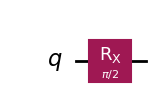

In [8]:
from numpy import pi
qc = QuantumCircuit(1)
qc.rx(pi/2, 0)
qc.draw('mpl')

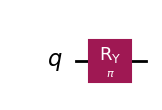

In [9]:
qc = QuantumCircuit(1)
qc.ry(pi, 0)  # Equivalent to Y gate
qc.draw('mpl')

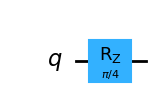

In [10]:
qc = QuantumCircuit(1)
qc.rz(pi/4, 0)
qc.draw('mpl')

## Section 0.1.3: Hadamard Gate

The **Hadamard gate (H)** creates a superposition:

$$H = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}$$

- $H|0⟩ = |+⟩$
- $H|1⟩ = |−⟩$

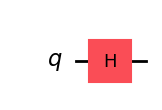

In [11]:
qc = QuantumCircuit(1)
qc.h(0)
qc.draw('mpl')

## Section 0.1.4: Useful Gate Identities and Algebra

### Properties of the Hadamard Gate:
- **Hermitian**: $H = H^\dagger$
- **Unitary**: $H^\dagger H = I$

### Common Identities:
- $X = HZH$
- $Z = HXH$
- $H^2 = I$
- $X^2 = Y^2 = Z^2 = I$
- $XYZ = iI$  → So $-iXYZ = I$

### Commutation / Anticommutation:
- $ZX = -XZ$
- $YX = -XY$
- $ZY = -YZ$

These identities arise from the non-commutative nature of quantum gates and are fundamental to quantum algorithms and error correction.

### Action of X on $|+⟩$ and $|−⟩$ States

The $|+⟩$ and $|−⟩$ states are defined as:
- $|+⟩ = \frac{1}{\sqrt{2}}(|0⟩ + |1⟩)$
- $|−⟩ = \frac{1}{\sqrt{2}}(|0⟩ - |1⟩)$

These are eigenstates of the Hadamard gate and are important for understanding quantum algorithms and measurement in different bases.

In [12]:
from qiskit.quantum_info import Statevector, Operator
from qiskit import QuantumCircuit

# Define |+⟩ and |−⟩ statevectors
plus = Statevector([1/2**0.5, 1/2**0.5])
minus = Statevector([1/2**0.5, -1/2**0.5])

# Create the X gate circuit
qc_x = QuantumCircuit(1)
qc_x.x(0)
op_x = Operator(qc_x)

# Evolve the states
print("X on |+⟩ →", plus.evolve(op_x))
print("X on |−⟩ →", minus.evolve(op_x))

X on |+⟩ → Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))
X on |−⟩ → Statevector([-0.70710678+0.j,  0.70710678+0.j],
            dims=(2,))


## Practice Questions
You may select more than 1 of the options.

**Q1.** Which of the following gate sequences is equivalent to the identity operation (up to global phase)?
- A. $H X H Z H X H$
- B. $X Z X Z$
- C. $Y Y$
- D. $X Y Z$

**Q2.** Suppose you start with the state $|+⟩$. Which of the following gates will transform it to $|0⟩$?
- A. $H$
- B. $X$
- C. $H Z$
- D. $Z H$

**Q3.** Which of the following statements is true about the commutation of gates?
- A. $ZX = XZ$
- B. $ZY = -YZ$
- C. $XY = -YX$
- D. $XZ = ZY$

**Q4.** Which of the following expressions is equivalent to applying $X$ followed by $Z$ to a qubit?
- A. $XZ$
- B. $-ZX$
- C. $H Y H$
- D. $iY$

**Q5.** Which of the following is equivalent to applying $R_x(\pi)$?
- A. $X$
- B. $H Z H$
- C. Two $R_x(\pi/2)$ gates in sequence
- D. $Z X Z$

### Answer Key
- Q1: C
- Q2: A
- Q3: B and C
- Q4: D
- Q5: C